In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.utils import shuffle


# Load data from CSV
df = pd.read_csv(r'/workspaces/RARE/healthcare-dataset-stroke-data.csv')  # replace with your filename

majority_class = df[df['stroke'] == 0]  # Assuming class 0 is the majority class
minority_class = df[df['stroke'] == 1]  # Assuming class 1 is the minority class

# Step 3: Randomly sample the majority class to match the minority class size
majority_class_undersampled = majority_class.sample(len(minority_class), random_state=42)

# Step 4: Combine the undersampled majority class with the minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Step 5: Shuffle the dataset to mix the classes
balanced_data = shuffle(balanced_data, random_state=42)

# Split features and target
X = balanced_data.drop(columns=['stroke', 'id', 'ever_married', 'work_type', 'Residence_type', 'gender', 'bmi'])
y = balanced_data['stroke']

print(X.head())

# Automatically one-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# class_labels = np.array([0, 1])

# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# # Create a dictionary for the class weights
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model with class weights
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")



       age  hypertension  heart_disease  avg_glucose_level   smoking_status
238   51.0             1              0              88.20     never smoked
2529  71.0             1              0             105.55           smokes
1544  55.0             0              0              87.78  formerly smoked
2610  69.0             0              0             111.48           smokes
2922  77.0             0              0              60.77           smokes
Epoch 1/50


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4722 - loss: 0.7046 - val_accuracy: 0.5250 - val_loss: 0.6389
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.6774 - val_accuracy: 0.6000 - val_loss: 0.6171
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.6393 - val_accuracy: 0.6750 - val_loss: 0.5953
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.6100 - val_accuracy: 0.7000 - val_loss: 0.5802
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.5834 - val_accuracy: 0.7250 - val_loss: 0.5666
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.5754 - val_accuracy: 0.7250 - val_loss: 0.5563
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.5456 - val_accuracy: 0.7250 - val_loss: 0.5443
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.5452 - val_accuracy: 0.7500 - val_loss: 0.5365
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Accuracy: 0.7800
Precision: 0.6981
Recall: 0.8605
F1 Score: 0.7708
AUC ROC: 0.7899

Confusion Matrix:
[[41 16]
 [ 6 37]]


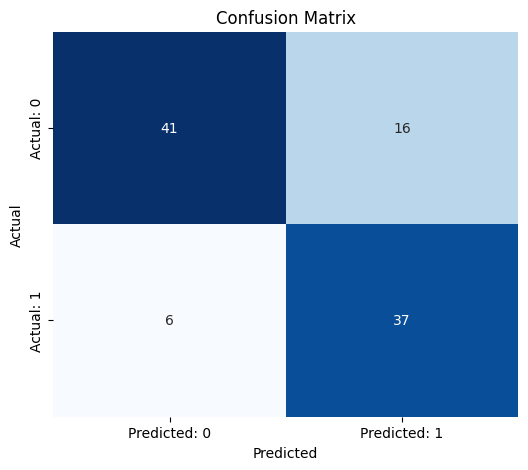

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Convert probabilities to binary labels


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Get AUC score


# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC ROC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted: 0', 'Predicted: 1'], 
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
y_pred_probs = model.predict(X_test_scaled)  # Get probabilities
print("Predicted probabilities: ", y_pred_probs[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predicted probabilities:  [[0.6290752 ]
 [0.7205613 ]
 [0.5270024 ]
 [0.9037009 ]
 [0.06334891]
 [0.18567145]
 [0.84808296]
 [0.89563584]
 [0.77597827]
 [0.9074413 ]]
